<a href="https://colab.research.google.com/github/youknowds/assignment/blob/python2/Homework3_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

-------------------------------------
Load the required libraries and the Nobel Prize dataset.

- Import the pandas library as pd.
- Import the seaborn library as sns.
- Import the numpy library as np.
- Use pd.read_csv to read in datasets/nobel.csv and save it into nobel.
- Show at least the first six entries of nobel using the head() method, setting n=6 or greater.


#### Good to know
Note: a test in this task relies on the expected last output of this cell. In this case, the first six entries of nobel being displayed. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

--------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Loading in required libraries/
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv('/content/gdrive/My Drive/nobel_new.csv')

# Taking a look at the first several winners
# ... YOUR CODE FOR TASK 1 ...
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

---------------------------------------------------
Count up the Nobel Prizes. Also, split by sex and birth_country.

- Count the number of rows/prizes using the len() function. Use the display() function to display the result.
- Count and display the number of prizes for each sex using the value_counts() method.
- Count the number of prizes for each birth_country using value_counts() and show the top 10 using head(). Do not use display().

#### Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

By default, a Jupyter Notebook (which is where you are working right now) will only show the final output in a cell. If you want to show intermediate results, you will have to use the display() function. See here for an example of how to use value_counts().

Why display() over print()? Try them both out for yourself. You'll find that the output of display() is prettier. :)

----------------------------------------------

In [5]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
display(len(nobel['prize'].unique()))
print()
# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
display(nobel['sex'].value_counts())
print()
# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
display(nobel['birth_country'].value_counts().head(10))

579

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

Create a DataFrame with two columns: decade and proportion of USA-born Nobel Prize winners that decade.

- Add a usa_born_winner column to nobel, where the value is True when birth_country is "United States of America".
- Add a decade column to nobel for the decade each prize was awarded. Here, np.floor() will come in handy. Ensure the decade column is of type int64.
- Use groupby to group by decade, setting as_index=False. Then isolate the usa_born_winner column and take the mean(). Assign the resulting DataFrame to prop_usa_winners.
- Display prop_usa_winners.

For the decade column, 1953 should become 1950, for example. Calculating this column is a bit tricky, but try to see if you can solve it using the np.floor function.

By setting as_index=False, you make sure that both the grouping variable and the calculated mean are included in the resulting DataFrame.

---------------------------------------

In [6]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country']=='United States of America'
nobel['decade'] = np.floor(nobel['year']/10)*10
nobel['decade']=nobel['decade'].astype('int64')
prop_usa_winners = nobel.groupby("decade",as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

---------------------------------------
Plot the proportion of USA born winners per decade.

- Use seaborn to plot prop_usa_winners with decade on the x-axis and usa_born_winner on the y-axis as an sns.lineplot. Assign the plot to ax.
- Fix the y-scale so that it shows percentages using PercentFormatter.

-----------------------------------

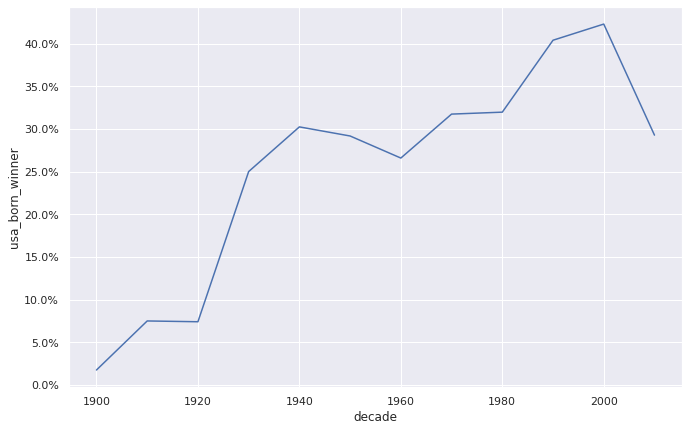

In [7]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x=prop_usa_winners['decade'],y=prop_usa_winners['usa_born_winner'])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...
ax.yaxis.set_major_formatter(PercentFormatter(1))  
plt.show()

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

--------------------------------------------
Plot the proportion of female laureates by decade split by prize category.

- Add the female_winner column to nobel, where the value is True when sex is "Female".
- Use groupby to group by both decade and category, setting as_index=False. Then isolate the female_winner column and take the mean(). Assign the resulting DataFrame to prop_female_winners.
- Copy and paste your seaborn plot from task 4 (including axis formatting code), but plot prop_female_winners and map the category variable to the hue parameter.

This task can be solved by copying and modifying the code from task 3 and 4.

-------------------------

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923
...,...,...,...
61,2010,Economics,0.000000
62,2010,Literature,0.285714
63,2010,Medicine,0.125000
64,2010,Peace,0.400000


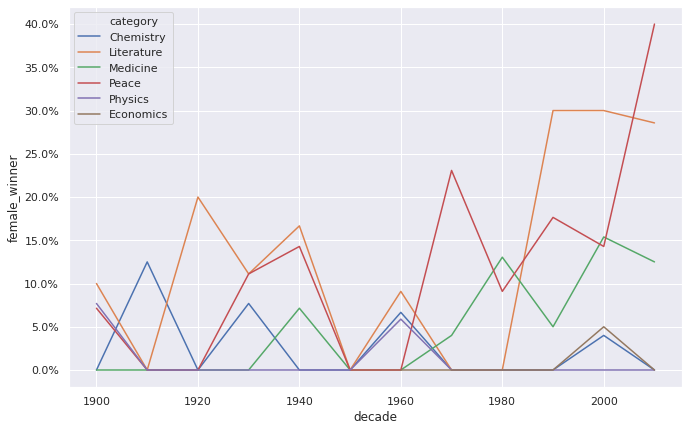

In [8]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex']=='Female'
prop_female_winners = nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()
display(prop_female_winners)

# Plotting USA born winners with % winners on the y-axis
# ... YOUR CODE FOR TASK 5 ...
plt.rcParams['figure.figsize'] = [11, 7]
ax = sns.lineplot(x=prop_female_winners['decade'],y=prop_female_winners['female_winner'],hue=prop_female_winners['category'])
ax.yaxis.set_major_formatter(PercentFormatter(1))  


## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

----------------------------------------
Extract and display the row showing the first woman to win a Nobel Prize.

- Select only the rows of 'Female' winners in nobel.
- Using the nsmallest() method with its n and columns parameters, pick out the first woman to get a Nobel Prize.

#### Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

----------------------------

In [9]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 5 ...
female_nobel = nobel[nobel['sex']=='Female']
female_nobel.nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

-------------------------------------------
Extract and display the rows of repeat Nobel Prize winners.

- Use groupby to group nobel by 'full_name'.
- Use the filter method to keep only those rows in nobel with winners with 2 or more prizes.

#### Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

--------------------------------------------------------------

In [ ]:
# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 5 ...
nobel.groupby('Full Name').filter(lambda x: len(x)>=2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False,1900,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,Japan,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False,2010,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False,2010,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",United States of America,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,True,2010,False


## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

------------------------------------------

Calculate and plot the age of each winner when they won their Nobel Prize.

- Convert the nobel['birth_date'] column to datetime using pd.to_datetime.
- Add a new column nobel['age'] that contains the age of each winner when they got the prize. That is, year of prize win minus birth year.
- Use sns.lmplot (not sns.lineplot) to make a plot with year on the x-axis and age on the y-axis.

#### Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

To get the year from a datetime column you need to use access the dt.year value. Here is an example:
##### a_data_frame['a_datatime_column'].dt.year

Seaborn's lmplot is a 2D scatterplot with an optional overlaid regression line. This type of plot is useful for visualizing linear relationships.

To make the plot prettier, add the arguments 
##### lowess=True, aspect=2, and line_kws={'color' : 'black'}.

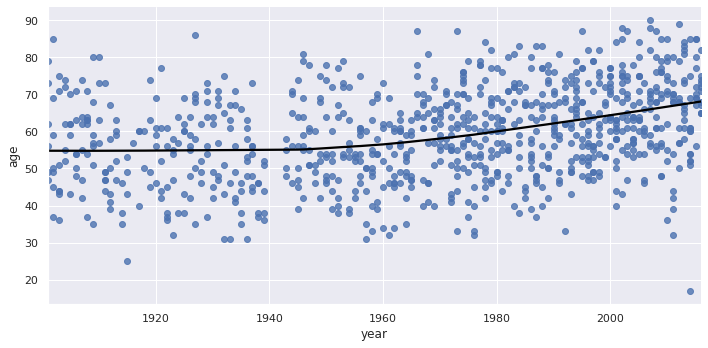

In [18]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year']-nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year',y='age',data=nobel,lowess=True, aspect=2,line_kws={'color' : 'black'})

## 9. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

--------------------------------------------
Plot how old winners are within the different price categories.

- As before, use sns.lmplot to make a plot with year on the x-axis and age on the y-axis. But this time, make one plot per prize category by setting the row argument to 'category'.

#### Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

--------------------------------

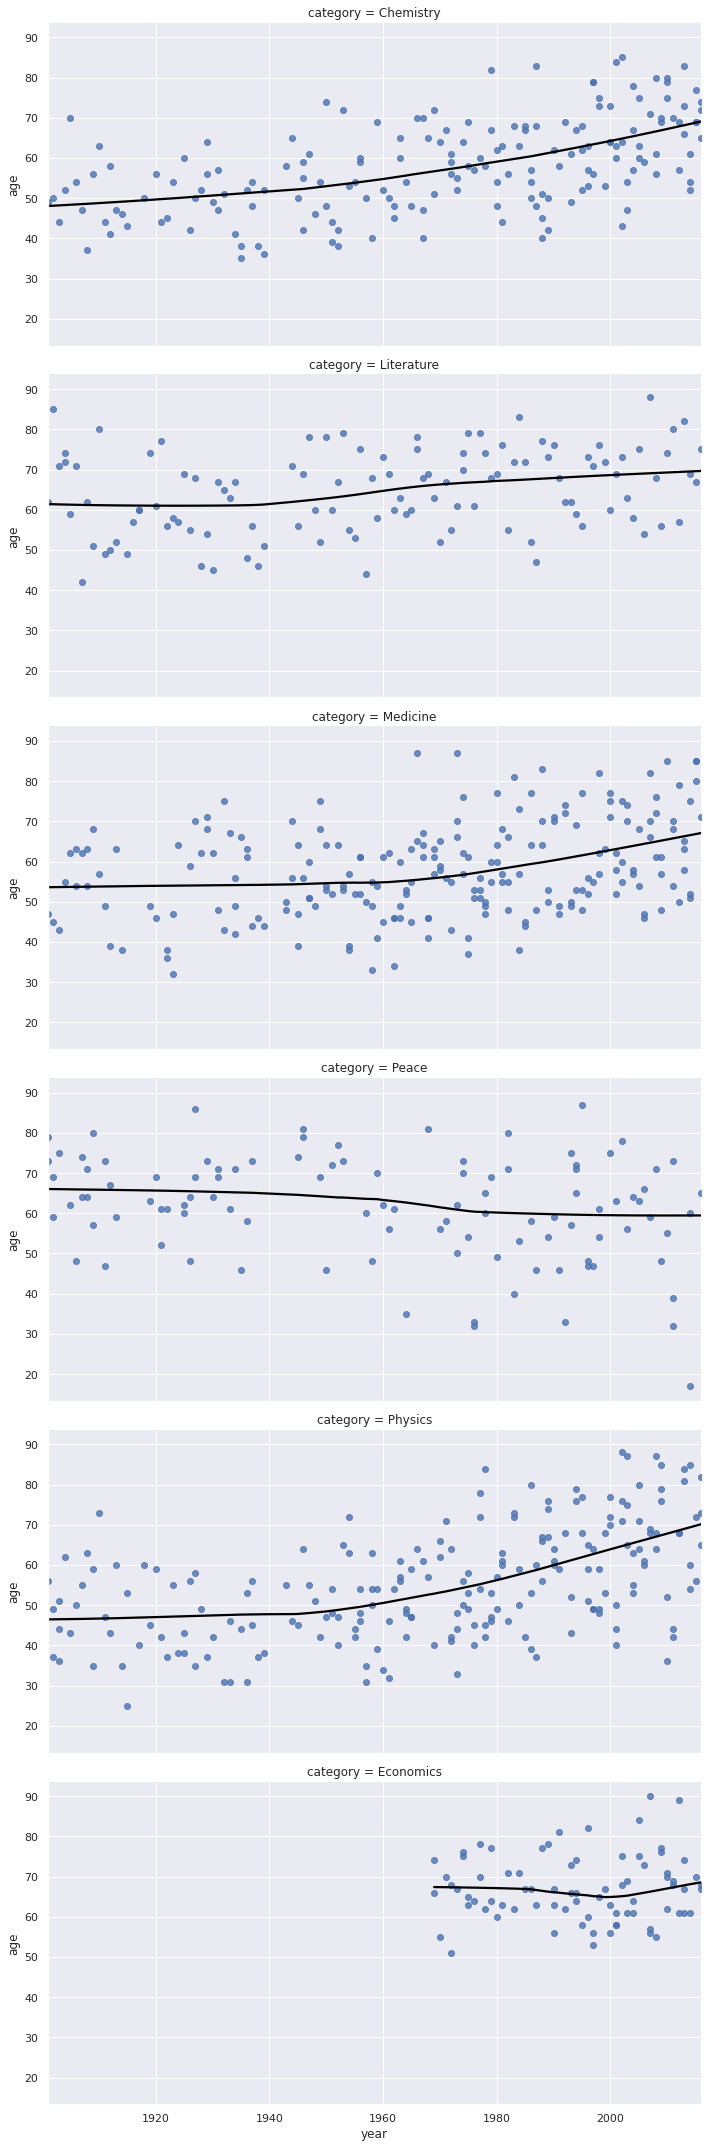

In [21]:
# Same plot as above, but faceted by the category of the Nobel Prize
# .... YOUR CODE FOR TASK 9 ....
sns.lmplot(x='year',y='age',data=nobel,row='category',lowess=True, aspect=2,line_kws={'color' : 'black'})

## 10. Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

-----------------------
Pick out the rows of the oldest and the youngest winner of a Nobel Prize.

- Use nlargest() to pick out and display the row of the oldest winner.
- Use nsmallest() to pick out and display the row of the youngest winner.

#### Note: a test in this task relies on the expected last output of this cell based on the order of the instructions. If this is not the case, you may run into the following error after ten seconds of the cell being processed: "Your code exceeded the maximum run time permitted."

---------------------

In [25]:
# The oldest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
display(nobel.nlargest(1,'age'))
# The youngest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
display(nobel.nsmallest(1,'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


## 11. You get a prize!
<p><img style="float: right;margin:20px 20px 20px 20px; max-width:200px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p>
<p>Hey! You get a prize for making it to the very end of this notebook! It might not be a Nobel Prize, but I made it myself in paint so it should count for something. But don't despair, Leonid Hurwicz was 90 years old when he got his prize, so it might not be too late for you. Who knows.</p>
<p>Before you leave, what was again the name of the youngest winner ever who in 2014 got the prize for "[her] struggle against the suppression of children and young people and for the right of all children to education"?</p>

---------------------
Assign the name of the youngest winner of a Nobel Prize to youngest_winner. The first name will suffice.

--------------------------------------

In [30]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = nobel.nsmallest(1,'age')['full_name'].values
display(youngest_winner)

array(['Malala Yousafzai'], dtype=object)